# Prueba Fundamentos Data Science
## Desafio 1 : Determinantes de Ingreso
##### Nombre: Francisco Sepulveda Barrueto
##### Generacion : G47
##### Profesores:  Alfonso Tobar-Sebastian Ulloa
##### Fecha :

### Hito 1:
- - 1) el tipo de problema a resolver (regresión o clasificación). Para cada uno de los enunciados y su problema identificado, se debe justificar el uso de métricas para medir el desempeño del problema.

- - 2) Se debe considerar el uso de las librerías asociadas para la ingesta,preprocesamiento, visualización y modelación, así como métricas de evaluación. (2 puntos)
- - 3) Se debe detallar y considerar el proceso de preprocesamiento y recodificación de datos. (2 puntos)



### Hito 2:
- - 1) La inspección visual del vector objetivo. (4 puntos)
- - 2) La inspección visual de las variables. (4 puntos)
- - 3) La inspección de datos perdidos en las variables. (2 puntos)
- - 4) De ser necesario, se puede iterar en el proceso de preprocesamiento y recodificación de las variables


### Hito 3:
- - 1)  La modelación mediante regresión de ambos problemas. (4 puntos)
- - 2) La interpretación de los principales regresores en cada problema. (4 puntos)
- - 3) La definición de las estrategias de Modelación predictiva. (2 puntos)


### Hito 4:

- - 1) ○ La preparación del ambiente de trabajo (imports, separación de muestras) para implementar modelos de predicción. (2 puntos)
- - 2) La implementación de por lo menos tres modelos predictivos. (4 puntos)
- - 3) El reporte del mejor modelo predictivo en base a los resultados. (4 puntos)


#### **Le encomiendan el desarrollo de un modelo predictivo sobre la probabilidad que un individuo presente salarios por sobre o bajo los 50.000 dólares anuales, en base a una serie de atributos sociodemográficos.**


# **Vector Objetivo : income: <=50K Si el individuo percibe ingresos inferiores a 50.000 dólares anuales**



In [108]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split,KFold,LeaveOneOut,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import mean_squared_error,accuracy_score
from feature_engine.encoding import OneHotEncoder,OrdinalEncoder
from feature_engine.imputation import CategoricalImputer,MeanMedianImputer
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,MinMaxScaler
from sklearn import set_config
set_config(display="diagram")
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

Exploracion Data Frame
Se busca saber que tipo de variables y datos se tienen y se procedera a realizar los cambios pedidos por enunciado

In [109]:
df=pd.read_csv("income-db.csv")
df.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [110]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [111]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [112]:
df=df.replace(to_replace = '?', value = np.nan)
df


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


- Lo dejo como NaN, ya que para poder hacer los modelos se reemplazara estos valores , ya sea con la media, mediana , moda , dependiendo del tipo de variable que sea 
- Para poder modificar el df, se utilizara Loc se reemplazara occupation, Workclass, Education, marital status, native country en ese orden 

In [113]:
df.loc[df.occupation.isin(['Prof-specialty', 'Exec-managerial', 'Adm-clerical', 'Sales,Tech-support']),"occupation"]= "white-collar "
df.loc[df.occupation.isin(['Craft-repair', 'Machine-op-inspct', 'Transport-moving,Handlers-cleaners', 'Farming-fishing', 'Protective-serv', 'Priv-house-serv']),"occupation"]="blue-collar"
df.loc[df.occupation.isin(['Other-service', 'Armed-Forces']),"occupation"]="others"


df.occupation.value_counts()


white-collar         17869
blue-collar          11849
Sales                 5504
others                4938
Transport-moving      2355
Handlers-cleaners     2072
Tech-support          1446
Name: occupation, dtype: int64

In [114]:
df.loc[df.workclass.isin(['Federal-gov']),"workclass"]= "federal-gov"
df.loc[df.workclass.isin(['State-gov', 'Local-gov']),"workclass"]="state-level-gov"
df.loc[df.workclass.isin(['Self-emp-inc', 'Self-emp-not-inc']),"workclass"]="self-employed "
df.loc[df.workclass.isin(['Never-worked', 'Without-pay']),"workclass"]="unemployed"
df.workclass.value_counts()

Private            33906
self-employed       5557
state-level-gov     5117
federal-gov         1432
unemployed            31
Name: workclass, dtype: int64

In [115]:
df.loc[df["marital-status"].isin(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse']),"marital-status"]= "married"
df.loc[df["marital-status"].isin(['Divorsed']),"marital-status"]= "divorced"
df.loc[df["marital-status"].isin(['Separated']),"marital-status"]= "separated"
df.loc[df["marital-status"].isin(['Widowed']),"marital-status"]= "widowed"
df["marital-status"].value_counts()

married          23044
Never-married    16117
Divorced          6633
separated         1530
widowed           1518
Name: marital-status, dtype: int64

In [116]:
df["native-country"].head(5)
# Pasises: United-States, Cambodia, England, Puerto-Rico,Canada, Germany, Outlying-US(Guam-USVI-etc), 
# India, Japan, Greece, South, China, Cuba,
#  Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,
# Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary,
# Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago,
# Peru, Hong, Holand-Netherlands.
#Contienentes: America,Europa,Asia,Africa,Oceania 
america=["United-States","Canada","Puerto-Rico", "Outlying-US(Guam-USVI-etc)","Cuba","Honduras","Jamaica", "Mexico","Dominican-Republic","Ecuador","Haiti","Columbia","Guatemala", "Nicaragua",
"El-Salvador","Trinadad&Tobago","Peru"]
europe=['England','Germany','Greece','Italy', 'Poland','Portugal','Ireland', 'France','Hungary','Scotland','Yugoslavia','Holand-Netherlands']
asia=["Cambodia","India", "Japan","China","Iran","Philippines","Vietnam","Laos","Taiwan","Thailand","Hong","South"]



In [117]:
df.loc[df["native-country"].isin(america),"native-country"]= "america"
df.loc[df["native-country"].isin(europe),"native-country"]= "europe"
df.loc[df["native-country"].isin(asia),"native-country"]= "asia"
df.loc[df["native-country"].isin(africa),"native-country"]= "africa"
df["native-country"].value_counts()



america    46109
asia        1096
europe       780
Name: native-country, dtype: int64

-  *Binarizando Income*

In [118]:
df["income"]=np.where(df.income=="<=50K",0,1)
df.income

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int32

In [119]:
#Finalmente cambio los nombre de las columnas 
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [120]:
df.columns=['age', 'workclass_recod', 'fnlwgt', 'educ_recod', 'educational-num',
       'civstatus', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'region',
       'income']

In [121]:
df

,age,workclass_recod,fnlwgt,educ_recod,educational-num,civstatus,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,region,income
0,25,Private,226802,11th,7,Never-married,blue-collar,Own-child,Black,Male,0,0,40,america,0
1,38,Private,89814,HS-grad,9,married,blue-collar,Husband,White,Male,0,0,50,america,0
2,28,state-level-gov,336951,Assoc-acdm,12,married,blue-collar,Husband,White,Male,0,0,40,america,1
3,44,Private,160323,Some-college,10,married,blue-collar,Husband,Black,Male,7688,0,40,america,1
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,america,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,married,Tech-support,Wife,White,Female,0,0,38,america,0
48838,40,Private,154374,HS-grad,9,married,blue-collar,Husband,White,Male,0,0,40,america,1
48839,58,Private,151910,HS-grad,9,widowed,white-collar,Unmarried,White,Female,0,0,40,america,0
48840,22,Private,201490,HS-grad,9,Never-married,white-collar,Own-child,White,Male,0,0,20,america,0


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass_recod  46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   educ_recod       48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   civstatus        48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  region           47985 non-null  object
 14  income           48842 non-null  int32 
dtypes: int32(1), int64(6), object(8)
memory usage: 5.4+ MB


### Luego de todo lo anterior se puede empezar a explorar sobre como se comportan las variables, para esto consultaremos sus estadisticas y su comportamiento a partor de graficos 

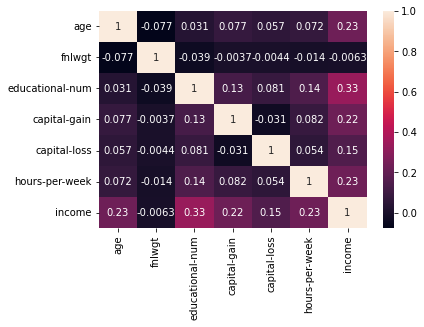

In [123]:
correlacion=df.corr(method='pearson')

sns.heatmap(correlacion,cbar=True,annot=True);

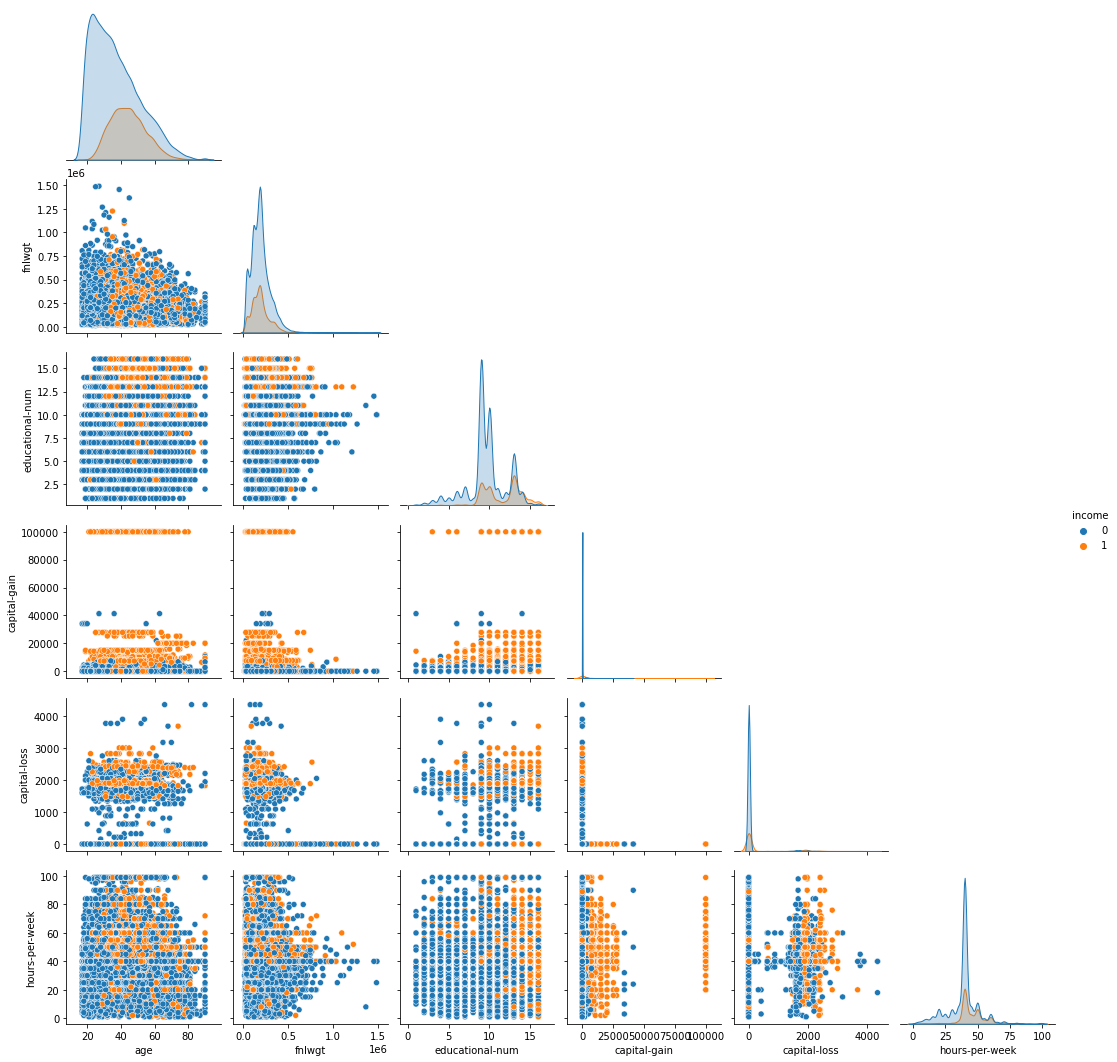

In [47]:
sns.pairplot(df,corner=True,hue="income");

# en este caso es posible visualizar como se comportan las variables numericas con respecto a nuestro vector objetivo o Income,
# donde se pueden observar que education puede tener una  efectodentro la probabilidad de la variable

#### En este caso el vector Objetivo es Income, un vector de caracter Binario, de una variable categorica, Por lo tanto el problema se resolvera como una regresion Logistica

In [124]:
df.income

0        0
1        0
2        1
3        1
4        0
        ..
48837    0
48838    1
48839    0
48840    0
48841    1
Name: income, Length: 48842, dtype: int32

In [126]:
# Definiendo el Vector Objetivo

y=df.income
X=df.drop(columns="income")

ci=CategoricalImputer(imputation_method='frequent') # Nulos de tipo Categoricos 
mmi=MeanMedianImputer(imputation_method='median') # Nulos de tipo numerico 

# Preprocesamiento
X_ci=ci.fit_transform(X)
X_mmi=mmi.fit_transform(X_ci)
ohe= OrdinalEncoder(encoding_method="arbitrary")
sc=SklearnTransformerWrapper(StandardScaler(),variables=["fnlwgt","age","educational-num","capital-gain","capital-loss","hours-per-week"])
X_ohe=ohe.fit_transform(X_mmi)
X_sc=sc.fit_transform(X_ohe)
X_final=sm.add_constant(X_sc)
# final de proprecaamiento 
model=sm.Logit(y,X_final).fit()
model.summary()



c:\Users\francisco.sepulveda\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.391219
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48827
Method:                           MLE   Df Model:                           14
Date:                Fri, 05 Aug 2022   Pseudo R-squ.:                  0.2890
Time:                        10:45:23   Log-Likelihood:                -19108.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.0484      0.046    -22.833      0.000      -1.138      -0.958
age                 0.5868      0.015     39.467      0.000       0.558       0.616
workclass_recod     0.0305      0.015      2.020      0.043       0.001       0.060
fnlwgt              0.0528      0.013      4.041      0.000       0.027       0.078
educ_recod          0.0031      0.005      0.643      0.520      -0.006       0.012
educational-num     0.8411      0.018     47.865      0.000       0.807       0.875
civstatus          -0.0897      0.014     -6.194      0.000      -0.118      -0.061
occupation         -0.0345      0.008     -4.372      0.000      -0.050      -0.019
relationship        0.0348      0.015      2.374      0.018       0.006       0.064
race                0.0761      0.029      2.613      0.009       0.019       0.133
gender             -1.1723      0.038    -31.166      0.000      -1.246      -1.099
capital-gain        2.3736      0.060     39.460      0.000       2.256       2.492
capital-loss        0.2669      0.011     24.628      0.000       0.246       0.288
hours-per-week      0.4183      0.014     30.524      0.000       0.391       0.445
region             -0.0574      0.040     -1.423      0.155      -0.136       0.022
===================================================================================
"""

In [127]:
print("Este es el AIC" ,model.aic )
print("Este es el BIC" ,model.bic )
y_pred=np.where(model.predict(X_final)>0.5,1,0)
accuracy_score(y,y_pred)

Este es el AIC 38245.80096531452
Este es el BIC 38377.74615347593


0.8221612546578764

####  - -  Tal como se pudo visualizar, en los graficos  los que tenian mayor correalacion con income tienen los factores positivos mas altos , como Capital Gains, eduaction Number, hours per week y edad , esto hace sentido ya que a medida que aumentan las capita gains deberia tener un ingreso mas alto teniendo una mayor probabilidad de tener un Income mayor a los 50K, mientras que el education Number indica que entre mahyor grado academico hay una mayor probabilidad de tner in ingreso mayor asi a su vez esto se refleja la edad y las horas trabajada por semana , donde la logica indica que a mayor cantidad de horas trabajadas se tendra mayor ingreso , y a medida que las personas aumentan su edad se espera que su salario aumente con el tiempo.


- De las medidas se puede decir que todas las variables parecen sisgnificativas segun el p value 

- Ademas nuestro modelo acierta un 82,21 % de las veces 





In [133]:
y=df.income
X=df.drop(columns=["income","region","educ_recod"])

ci=CategoricalImputer(imputation_method='frequent') # Nulos de tipo Categoricos 
mmi=MeanMedianImputer(imputation_method='median') # Nulos de tipo numerico 

# Preprocesamiento
X_ci=ci.fit_transform(X)
X_mmi=mmi.fit_transform(X_ci)
ohe= OrdinalEncoder(encoding_method="arbitrary")
sc=SklearnTransformerWrapper(StandardScaler(),variables=["fnlwgt","age","educational-num","capital-gain","capital-loss","hours-per-week"])
X_ohe=ohe.fit_transform(X_mmi)
X_sc=sc.fit_transform(X_ohe)
X_final=sm.add_constant(X_sc)
# final de proprecaamiento 
model=sm.Logit(y,X_final).fit()
model.summary()


c:\Users\francisco.sepulveda\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


Optimization terminated successfully.
         Current function value: 0.391243
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 income   No. Observations:                48842
Model:                          Logit   Df Residuals:                    48829
Method:                           MLE   Df Model:                           12
Date:                Fri, 05 Aug 2022   Pseudo R-squ.:                  0.2890
Time:                        10:47:17   Log-Likelihood:                -19109.
converged:                       True   LL-Null:                       -26875.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.0278      0.042    -24.633      0.000      -1.110      -0.946
age                 0.5870      0.015     39.497      0.000       0.558       0.616
workclass_recod     0.0305      0.015      2.023      0.043       0.001       0.060
fnlwgt              0.0524      0.013      4.006      0.000       0.027       0.078
educational-num     0.8458      0.015     57.650      0.000       0.817       0.875
civstatus          -0.0896      0.014     -6.186      0.000      -0.118      -0.061
occupation         -0.0345      0.008     -4.375      0.000      -0.050      -0.019
relationship        0.0342      0.015      2.332      0.020       0.005       0.063
race                0.0643      0.028      2.300      0.021       0.010       0.119
gender             -1.1715      0.038    -31.154      0.000      -1.245      -1.098
capital-gain        2.3743      0.060     39.470      0.000       2.256       2.492
capital-loss        0.2668      0.011     24.620      0.000       0.246       0.288
hours-per-week      0.4185      0.014     30.539      0.000       0.392       0.445
===================================================================================
"""

In [132]:
print("Este es el AIC" ,model.aic )
print("Este es el BIC" ,model.bic )
y_pred=np.where(model.predict(X_final)>0.5,1,0)
accuracy_score(y,y_pred)

Este es el AIC 38244.22870913651
Este es el BIC 38358.58120554306


0.8221817288399328

- los valores de AIC Y BIC aumentaron levemente, pero el accuracy aumento levemente.


 ## Modelo

En [P(evento)/P(no evento)] = β0 + β1x1 + β2x2 + ... + βnxn
Los coeficientes mas grandes y positivos indican que cuando este ocurre existe una mayor posibilidad de que el event ocurra en este caso que se tenga un ingreso mayor a 50K,
mientras que los con coeficientes negativos indican menos probable que ocurra 

In [136]:
df["income"].value_counts()

0    37155
1    11687
Name: income, dtype: int64

- En este caso hasta el intercepto tiene logica , ya que existe una mayor cantidad de personas con ingreso menor a 50K exitiendo mayor porobailidad de que el evento no ocurra osea que tengamos un ingreso menor a 50K


- LAs variables con mayor impacto positivo de evento es capital gains , education number, hours per week 

- Mientras que la mas negativa es gender

# Modelamiento Predictivo 


- Vamos a crear un Pipeline para poder ir realizando el preprocesamiento de los modelos de manera mas rapida y ordenada.
- utilizaremos la tecnica de crossvalidation con el metodo de kfold.
- Con esto realizaremos el Hiperparameter Tunining para presentar 3 modelos 


In [137]:
pipe1=Pipeline(steps=[("ci",CategoricalImputer(imputation_method="frequent")),
('mmi',MeanMedianImputer(imputation_method="median")),
('ohe',OrdinalEncoder(encoding_method="arbitrary")),
('sc',SklearnTransformerWrapper(StandardScaler(),variables=["fnlwgt","age","educational-num","capital-gain","capital-loss","hours-per-week"])),
("lr",LogisticRegression(random_state=42))
])
pipe1

Pipeline(steps=[('ci', CategoricalImputer(imputation_method='frequent')),
                ('mmi', MeanMedianImputer()),
                ('ohe', OrdinalEncoder(encoding_method='arbitrary')),
                ('sc',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['fnlwgt', 'age',
                                                      'educational-num',
                                                      'capital-gain',
                                                      'capital-loss',
                                                      'hours-per-week'])),
                ('lr', LogisticRegression(random_state=42))])

In [138]:
y=df.income
X=df.drop(columns=["income"])
modelo1=cross_val_score(pipe1,X,y,cv=5,scoring="accuracy")
print(f"El modelo tiene un acurracy de {modelo1.mean()}+-{modelo1.std()}")

El modelo tiene un acurracy de 0.8254779719463924+-0.006535689081714284


In [139]:
pipe2=Pipeline(steps=[("ci",CategoricalImputer(imputation_method="missing")),
('mmi',MeanMedianImputer(imputation_method="mean")),
('ohe',OrdinalEncoder(encoding_method="arbitrary")),
('sc',SklearnTransformerWrapper(StandardScaler(),variables=["fnlwgt","age","educational-num","capital-gain","capital-loss","hours-per-week"])),
("lr",LogisticRegression(random_state=42))
])
pipe2

Pipeline(steps=[('ci', CategoricalImputer()),
                ('mmi', MeanMedianImputer(imputation_method='mean')),
                ('ohe', OrdinalEncoder(encoding_method='arbitrary')),
                ('sc',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['fnlwgt', 'age',
                                                      'educational-num',
                                                      'capital-gain',
                                                      'capital-loss',
                                                      'hours-per-week'])),
                ('lr', LogisticRegression(random_state=42))])

In [140]:
y=df.income
X=df.drop(columns=["income"])
modelo2=cross_val_score(pipe2,X,y,cv=5,scoring="accuracy")
print(f"El modelo tiene un acurracy de {modelo2.mean()}+-{modelo2.std()}")

El modelo tiene un acurracy de 0.8260512347931735+-0.00645249667486491


In [144]:
pipe3=Pipeline(steps=[("ci",CategoricalImputer(imputation_method="missing")),
('mmi',MeanMedianImputer(imputation_method="mean")),
('ohe',OrdinalEncoder()),
('sc',SklearnTransformerWrapper(StandardScaler(),variables=["fnlwgt","age","educational-num","capital-gain","capital-loss","hours-per-week"])),
("lr",LogisticRegression(random_state=42,max_iter=100000))
])
pipe3

Pipeline(steps=[('ci', CategoricalImputer()),
                ('mmi', MeanMedianImputer(imputation_method='mean')),
                ('ohe', OrdinalEncoder()),
                ('sc',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['fnlwgt', 'age',
                                                      'educational-num',
                                                      'capital-gain',
                                                      'capital-loss',
                                                      'hours-per-week'])),
                ('lr', LogisticRegression(max_iter=100000, random_state=42))])

In [145]:
y=df.income
X=df.drop(columns=["income"])
modelo3=cross_val_score(pipe3,X,y,cv=5,scoring="accuracy")
print(f"El modelo tiene un acurracy de {modelo3.mean()}+-{modelo3.std()}")

El modelo tiene un acurracy de 0.8472831205096535+-0.003351962109405734


In [146]:
pipe4=Pipeline(steps=[("ci",CategoricalImputer(imputation_method="missing")),
('mmi',MeanMedianImputer(imputation_method="mean")),
('ohe',OrdinalEncoder()),
("pl",SklearnTransformerWrapper(PolynomialFeatures(degree=2,interaction_only=True,include_bias=False),variables=['educ_recod','occupation'])),
('sc',SklearnTransformerWrapper(StandardScaler(),variables=["fnlwgt","age","educational-num","capital-gain","capital-loss","hours-per-week"])),
("lr",LogisticRegression(random_state=42,max_iter=100000))
])
pipe4

Pipeline(steps=[('ci', CategoricalImputer()),
                ('mmi', MeanMedianImputer(imputation_method='mean')),
                ('ohe', OrdinalEncoder()),
                ('pl',
                 SklearnTransformerWrapper(transformer=PolynomialFeatures(include_bias=False,
                                                                          interaction_only=True),
                                           variables=['educ_recod',
                                                      'occupation'])),
                ('sc',
                 SklearnTransformerWrapper(transformer=StandardScaler(),
                                           variables=['fnlwgt', 'age',
                                                      'educational-num',
                                                      'capital-gain',
                                                      'capital-loss',
                                                      'hours-per-week'])),
                ('lr', LogisticRegression(max_iter=100000, random_state=42))])

In [147]:
y=df.income
X=df.drop(columns=["income"])
modelo4=cross_val_score(pipe4,X,y,cv=5,scoring="accuracy")
print(f"El modelo tiene un acurracy de {modelo4.mean()}+-{modelo4.std()}")

El modelo tiene un acurracy de 0.8472831163178179+-0.0031893781798276806


- El Modelo 4 tiene el mayor accurracy de todos , de 0.8472 +-0.003137365714155763.

- Ademas que presenta estabilidad porque su desviacion no es alta 

- Se podria seguir iterando con los paremtros agregando diferentes variables e interacciones